In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [2]:
class World:
    def __init__(self, debug=False):                 # ここにロボットなどのオブジェクトを登録
        self.objects = []
        self.debug = debug
        
    def append(self, obj):              # オブジェクトを登録するための関数
        self.objects.append(obj)
        
    def draw(self):
        fig = plt.figure(figsize=(8, 8))     # 8*8 inchの図を準備
        ax = fig.add_subplot(111)            # サブプロットを準備
        ax.set_aspect('equal')               # 縦横比を座標の値と一致させる
        ax.set_xlim(-5, 5)                   # X軸を-5m * 5m の範囲で描画
        ax.set_ylim(-5, 5)                   # Y軸も同様に
        ax.set_xlabel("X", fontsize=20)      # X軸にラベルを表示
        ax.set_ylabel("Y", fontsize=20)      # 同じくY軸に
        
        elems = []
        
        if self.debug:
            for i in range(1000):
                self.one_step(i, elems, ax)
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)
            plt.show()
        
    def one_step(self, i, elems, ax):
        pass

In [3]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose               # 引数から姿勢の初期値を設定
        self.r = 0.2                   # これは描画のためなので固定値
        self.color = color             # 引数から描画するときの色を指定
        
    def draw(self, ax):
        x, y, theta = self.pose             # 姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta)   # ロボットの鼻先のx座標
        yn = y + self.r * math.sin(theta)   # ロボットの鼻先のy座標
        ax.plot([x, xn], [y, yn], color=self.color)    # ロボットの向きを表す線分の描画
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color)   # ロボットの円を表すオブジェクト
        ax.add_patch(c) # 円を描画

<IPython.core.display.Javascript object>


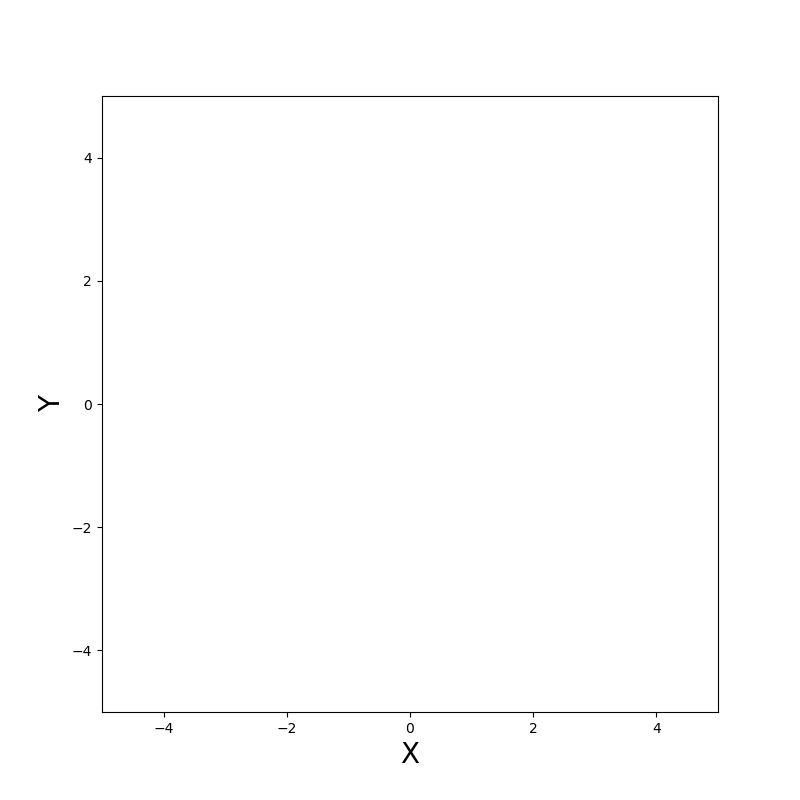

In [4]:
world = World()

robot1 = IdealRobot(np.array([2, 3, math.pi/6]).T)
robot2 = IdealRobot(np.array([-2, 1, math.pi/5*6]).T, "red")
world.append(robot1)
world.append(robot2)
world.draw()